In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram')

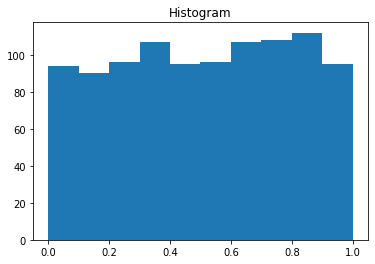

In [243]:
rand_numbers = np.random.random(1000)
plt.hist(rand_numbers)
plt.title('Histogram')

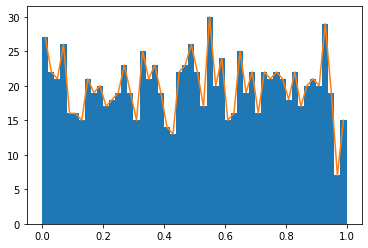

In [241]:
n, bins, patch = plt.hist(rand_numbers, bins=50)
binns = np.zeros(n.shape)
for i in range(int(n.shape[0])):
    binns[i] =(bins[i]+bins[i+1])/2
    
bins = binns
plt.plot(bins,n)

# Evaluating the Mean of Random Generator

In [92]:
data = []
samples = [1.7**i for i in range(25)]
Q=50
for sample_size in samples :
    mean = 0
    std = 0
    for q in range(Q):
        a = np.random.random(int(sample_size))
        mean += a.mean()
        std += a.std()
    data.append((sample_size, mean/Q, std/Q))

In [93]:
data = np.array(data)


Text(0, 0.5, 'mean')

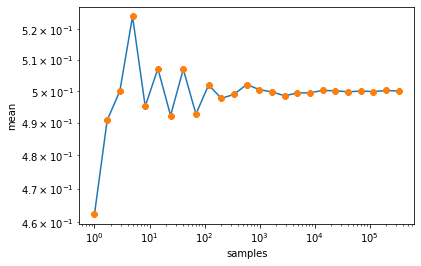

In [96]:
plt.loglog(data[:,0],data[:,1])
plt.loglog(data[:,0],data[:,1],'8')
plt.xlabel('samples')
plt.ylabel('mean')

Text(0, 0.5, 'std')

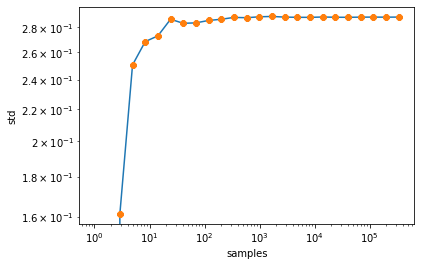

In [97]:
plt.loglog(data[:,0],data[:,2])
plt.loglog(data[:,0],data[:,2],'8')
plt.xlabel('samples')
plt.ylabel('std')

# Corelation 

In [184]:
#rand_data = np.array([i%2 + 1 for i in range(50)])
#rand_data = np.array([1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,-1,-2,-3,-4,-5,-6,-7,-8,-9])

In [225]:
cor_data= []
Q = 20
tau_list= [i for i in range(1,120)]
for tau in tau_list :
    Cor=0
    for q in range(Q):
        cor=0
        rand_data = np.random.random(5000)
        
        for i in range(rand_data.shape[0]-tau):
            cor += rand_data[i]*rand_data[i+tau]
            
        Cor += (cor/(5000-tau) - rand_data.mean()**2)/rand_data.std()**2
        #Cor += (cor/(5000-tau))
    cor_data.append((tau,Cor/Q))
    
cor_data = np.array(cor_data)


Text(0, 0.5, '$R(\\tau)$')

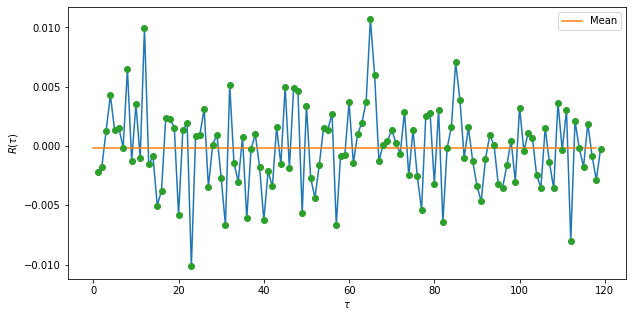

In [258]:
plt.figure(figsize=(10,5))
plt.plot(cor_data[:,0], cor_data[:,1])
plt.plot([cor_data[:,1].mean() for i in range(cor_data[:,1].shape[0])], label='Mean')
plt.legend()
plt.plot(cor_data[:,0], cor_data[:,1],'o')
plt.xlabel('$\\tau$')
plt.ylabel('$R(\\tau)$')

(array([ 1.,  0.,  1.,  5.,  4.,  2., 11.,  9., 19., 13., 12., 17.,  9.,
         7.,  4.,  2.,  1.,  0.,  0.,  2.]),
 array([-0.01015375, -0.00911253, -0.00807131, -0.00703009, -0.00598887,
        -0.00494765, -0.00390643, -0.00286521, -0.00182399, -0.00078278,
         0.00025844,  0.00129966,  0.00234088,  0.0033821 ,  0.00442332,
         0.00546454,  0.00650576,  0.00754698,  0.0085882 ,  0.00962942,
         0.01067064]),
 <a list of 20 Patch objects>)

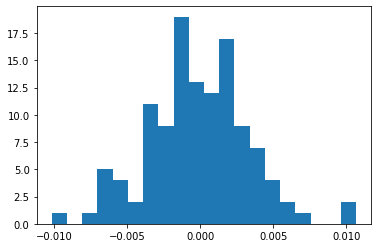

In [227]:
plt.hist(cor_data[:,1],bins=20)

# second Correlation Test

In [279]:
n = 100000
rand_data=[]
selected_rand = []
for i in range(n):
    rand_data.append(np.random.randint(10))
for i in range(1,n):
    if rand_data[i-1]==4:
        selected_rand.append(rand_data[i])

(array([1022.,  990., 1050., 1014., 1013., 1022.,  979.,  943., 1004.,
         962.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

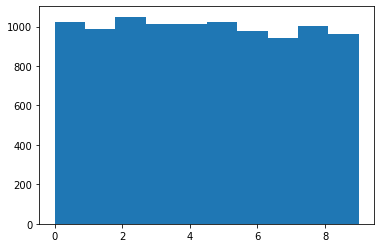

In [281]:
plt.hist(selected_rand, bins=10)

# Generating the Guassian Random Nmubers

In [20]:
sigma = 100
guassian_random = []
for i in range(10000):
    th = 2*np.pi*np.random.random()
    r = (-2*sigma**2*np.log(1-np.random.random()))**0.5
    guassian_random.append(r*np.sin(th))

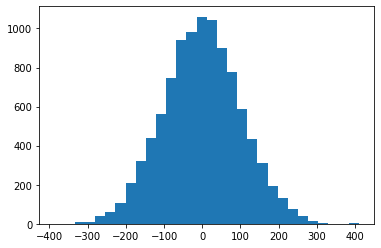

In [21]:
n, bins, patch= plt.hist(guassian_random,bins=30)

# Centeral Limit theorem

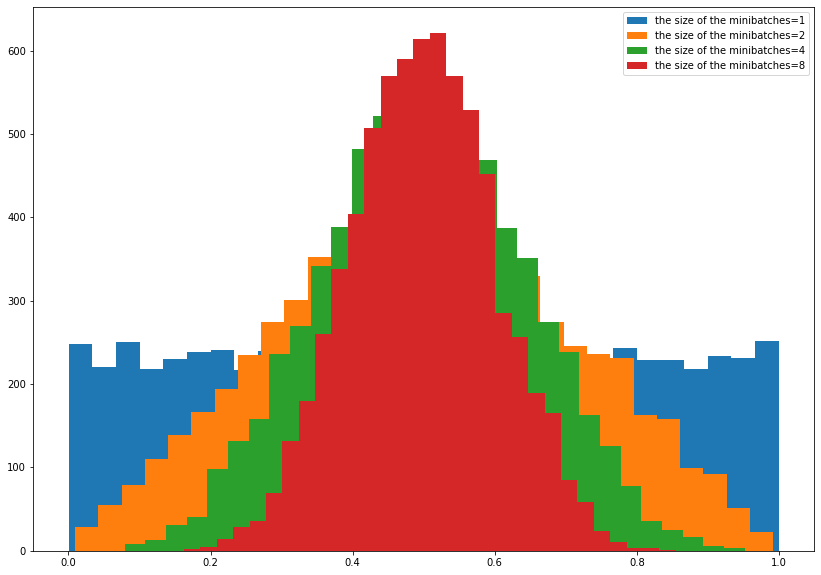

In [58]:
plt.figure(figsize=(14,10))
Q = 1000
N = 7000
counter=0
Qlist = [2**i for i in range(4)]
G_data=[]
for Qsize in Qlist:
    Q = Qsize
    G_data = []
    for i in range(N):
        counter =0
        for j in range(Q):
            counter+=np.random.random()
        G_data.append(counter/Q)
    n,bins, patch = plt.hist(G_data,bins=30,label='the size of the minibatches={}'.format(Q))
plt.legend()

Text(0.5, 1.0, 'Centeral limit theorem')

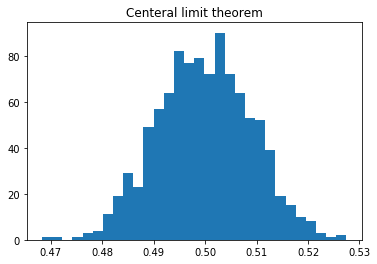

In [27]:
n,bins, patch = plt.hist(G_data,bins=30)

plt.title('Centeral limit theorem')

Text(0.5, 1.0, 'The Ceneral Theorem with Exponenrial Random Generator')

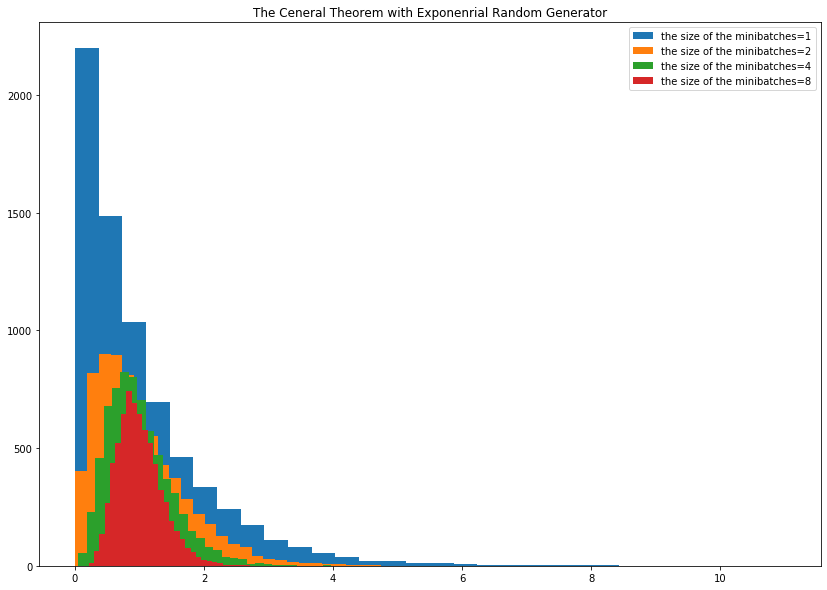

In [72]:
plt.figure(figsize=(14,10))
Q = 1000
N = 7000
counter=0
Qlist = [2**i for i in range(4)]
G_data=[]
for Qsize in Qlist:
    Q = Qsize
    G_data = []
    for i in range(N):
        counter =0
        for j in range(Q):
            counter+=np.random.exponential()
        G_data.append(counter/Q)
    n,bins, patch = plt.hist(G_data,bins=30,label='the size of the minibatches={}'.format(Q))
plt.legend()
plt.title('The Ceneral Theorem with Exponenrial Random Generator')

Text(0.5, 1.0, 'Ceneral limit theorem with triangular distribution')

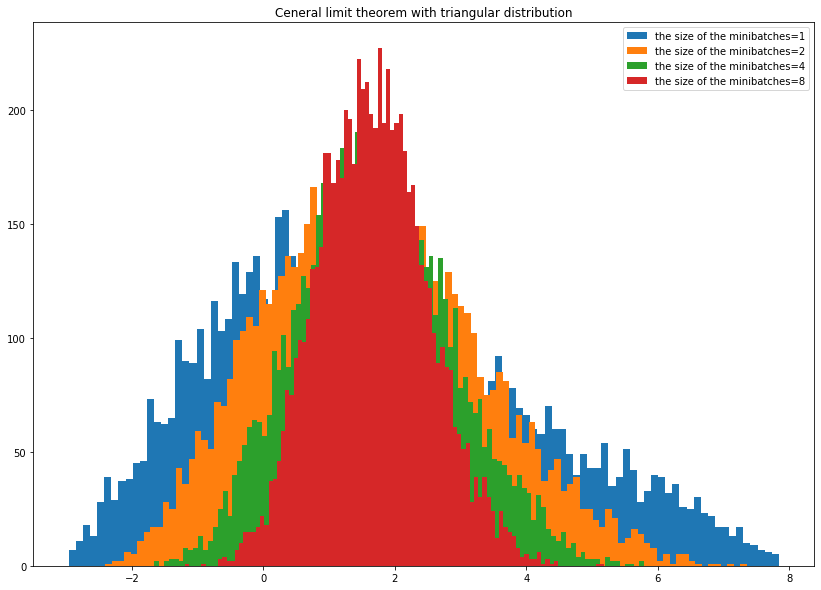

In [84]:
plt.figure(figsize=(14,10))
Q = 1000
N = 7000
counter=0
Qlist = [2**i for i in range(4)]
G_data=[]
for Qsize in Qlist:
    Q = Qsize
    G_data = []
    for i in range(N):
        counter =0
        for j in range(Q):
            counter+=np.random.triangular(-3, 0, 8)
        G_data.append(counter/Q)
    n,bins, patch = plt.hist(G_data,bins=100,label='the size of the minibatches={}'.format(Q))
plt.legend()
plt.title('Ceneral limit theorem with triangular distribution')

In [80]:
a = np.random.triangular(-3, 0, 8)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.84893315, 0.85893315, 0.86893315, 0.87893315, 0.88893315,
        0.89893315, 0.90893315, 0.91893315, 0.92893315, 0.93893315,
        0.94893315, 0.95893315, 0.96893315, 0.97893315, 0.98893315,
        0.99893315, 1.00893315, 1.01893315, 1.02893315, 1.03893315,
        1.04893315, 1.05893315, 1.06893315, 1.07893315, 1.08893315,
        1.09893315, 1.10893315, 1.11893315, 1.12893315, 1.13893315,
        1.14893315, 1.15893315, 1.16893315, 1.17893315, 1.18893315,
        1.19893315, 1.20893315, 1.21893315, 1.22893315, 1.23893315,
      

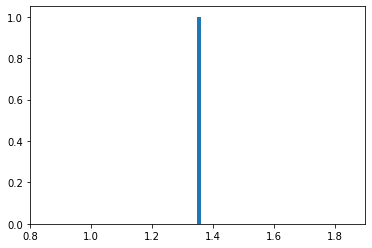

In [81]:
plt.hist(a,bins=100)

In [88]:
for i in range(1000):
    data.append(-10*np.random.randn()+ 10*np.random.randn())

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   2.,   1.,   2.,   3.,   2.,   1.,   5.,   1.,   0.,
          5.,   3.,   4.,   5.,   7.,   7.,   8.,   7.,  13.,   6.,  10.,
         17.,  10.,  20.,  19.,  21.,  26.,  30.,  41.,  33.,  45.,  42.,
         67.,  61.,  62.,  77.,  84.,  69.,  91., 170., 617., 339., 179.,
        109.,  74.,  80.,  54.,  52.,  58.,  43.,  26.,  32.,  32.,  25.,
         23.,  20.,  18.,  17.,  16.,  12.,  12.,   8.,   9.,  10.,   4.,
          4.,   8.,   4.,   4.,   5.,   3.,   5.,   4.,   1.,   1.,   1.,
          1.,   2.,   2.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,
          1.]), array([-48.30036588, -47.36936328, -46.43836068, -45.50735807,
        -44.57635547, -43.64535287, -42.71435027, -41.78334767,
        -40.85234506, -39.92134246, -38.99033986, -38.05933726,
        -37.12833466, -36.19733205, -35.26632945, -34.33532685,
        -33.40432425, -32.47332164, -31.54231904, -30.61131644,

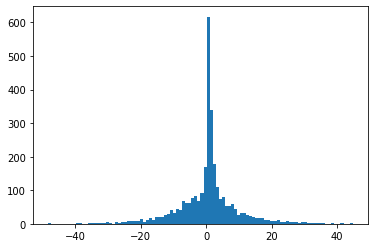

In [89]:
plt.hist(data,bins=100)